In [22]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import os

In [23]:
sheet_path = 'C:/Users/lucas/OneDrive/Área de Trabalho/UFABC/FisicaComp/AV3/Cópia de Tabela 6.1 (EstratoGeog).xls'
sheet_path = "C:/Users/lucas.lucca/Desktop/AVs/AV3/Cópia de Tabela 6.1 (EstratoGeog).xls"

In [24]:
df = pd.DataFrame()

In [25]:
cols = ['Nome', 'total (1000 pessoas)',
       'Nível de ocupação das pessoas de 14 anos de idade ou mais (%)',
       'Taxa de desocupação das pessoas de 14 anos de idade ou mais (%)',
       'Proporção de pessoas com rendimento domiciliar per capita abaixo de US$ 6,85 PPC 2017 (%)',
       'Proporção de pessoas vivendo em domicílios com esgotamento por rede coletora ou pluvial (%)',
       'Proporção de pessoas vivendo em domicílios com máquina de lavar roupa (%)',
       'Proporção de pessoas vivendo em domicílios com acesso à Internet (%)',
       'Proporção de pessoas de 18 a 29 anos de idade com no mínimo 12 anos de\nestudo (%)']

In [26]:
for i in ['2023', '2022', '2021', '2020', '2019']:
    dt = pd.read_excel(sheet_path, sheet_name=i)
    dt.columns = cols
    dt['Ano'] = i
    df = pd.concat([df, dt], ignore_index=True)
    del dt

In [27]:
df.dropna(subset=['Nome'], inplace = True)

In [28]:
top_50 = df.sort_values('total (1000 pessoas)')

In [29]:
nomes = [
 'Curitiba',
 'Manaus',
 'Baixada Santista',
 'Belo Horizonte',
 'Fortaleza',
 'Salvador',
 'Campinas',
 'Distrito Federal',
 'Rio de Janeiro',
 'São Paulo']

In [30]:
sns.set_theme(style="darkgrid")

In [31]:
df['Ano'] = df['Ano'].astype(int)

In [32]:
grandes = ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Fortaleza', 'Salvador']
medias = ['Manaus', 'Campinas', 'Baixada Santista', 'Curitiba', 'Distrito Federal']

In [33]:
cols = [
    'Nome da Região',
    'População Total (milhares de pessoas)',
    'Nível de Ocupação (pessoas 14+ anos, %)',
    'Taxa de Desocupação (pessoas 14+ anos, %)',
    'Proporção de Pessoas com Renda Domiciliar Per Capita Abaixo de US$ 6,85 PPC 2017 (%)',
    'Proporção de Domicílios com Esgotamento por Rede Coletora ou Pluvial (%)',
    'Proporção de Domicílios com Máquina de Lavar Roupa (%)',
    'Proporção de Domicílios com Acesso à Internet (%)',
    'Proporção de Jovens (18-29 anos) com 12+ Anos de Estudo (%)'
    'Ano'
]

In [34]:
for i in range(len(df.columns)):
    try:
        df.rename(columns = {df.columns[i]: cols[i]}, inplace=True)
    except:
        pass

In [35]:
top_cidades = df[df['Nome da Região'].isin(nomes)]

In [36]:
df

,Nome da Região,População Total (milhares de pessoas),"Nível de Ocupação (pessoas 14+ anos, %)","Taxa de Desocupação (pessoas 14+ anos, %)","Proporção de Pessoas com Renda Domiciliar Per Capita Abaixo de US$ 6,85 PPC 2017 (%)",Proporção de Domicílios com Esgotamento por Rede Coletora ou Pluvial (%),Proporção de Domicílios com Máquina de Lavar Roupa (%),Proporção de Domicílios com Acesso à Internet (%),Proporção de Jovens (18-29 anos) com 12+ Anos de Estudo (%)Ano,Ano
0,Brasil,215602.317008,57.600005,7.755964,27.366993,67.920392,70.777958,92.943625,73.110318,2023
1,Porto-Velho,566.733000,52.024176,4.372144,27.949107,48.301162,88.534601,95.379771,73.983769,2023
2,Vilhena,433.360999,52.882835,1.654324,22.615413,43.371515,92.961379,94.615318,63.473197,2023
3,Ariquemes/Ji-Paraná,840.472001,58.443918,3.076056,22.957235,8.295497,67.124933,94.403414,65.485250,2023
4,Rio Branco,431.320000,50.005031,9.346129,43.452910,81.106536,78.540753,91.870826,72.893202,2023
...,...,...,...,...,...,...,...,...,...,...
730,Integrada de Brasília em Goiás,1284.404000,55.158604,19.838596,42.199371,39.46521,70.985006,88.93673,65.590705,2019
731,Norte de Goiás,504.584266,52.682366,12.872904,41.259439,34.910126,54.06877,68.134824,63.683069,2019
732,Sul de Goiás,1461.414961,63.342027,7.509531,22.440470,72.178885,79.343532,89.766284,66.386625,2019
733,Centro-Oeste de Goiás,1163.642774,57.524420,8.548573,24.804900,59.648014,77.940312,84.635984,63.549617,2019


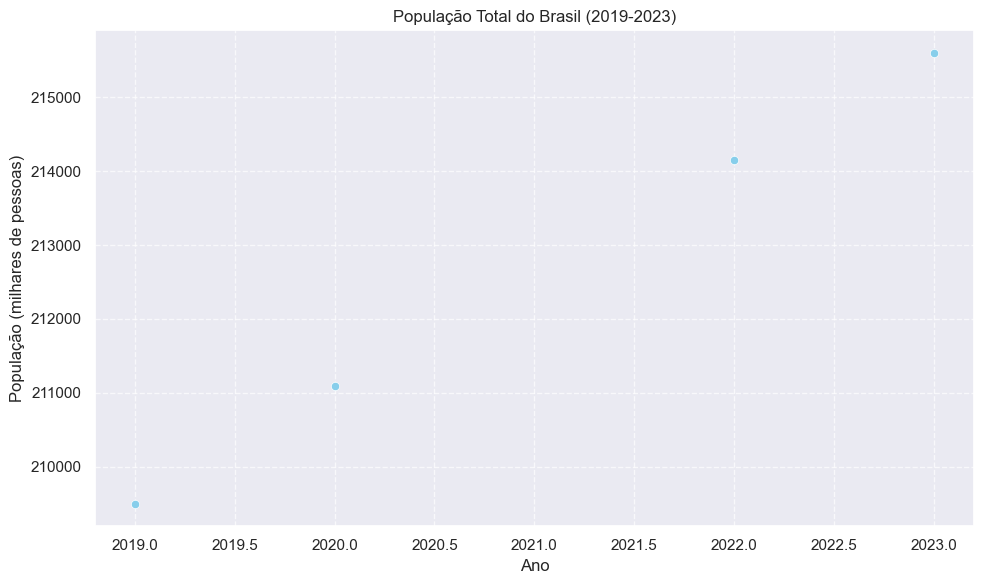

In [37]:
# Gráfico da População Total do Brasil ao longo dos anos
df_brasil = df[df['Nome da Região'] == 'Brasil']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_brasil, x='Ano', y='População Total (milhares de pessoas)', marker='o', color='skyblue')
plt.title('População Total do Brasil (2019-2023)')
plt.xlabel('Ano')
plt.ylabel('População (milhares de pessoas)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='y') # Evita notação científica no eixo Y
plt.tight_layout()
plt.show()

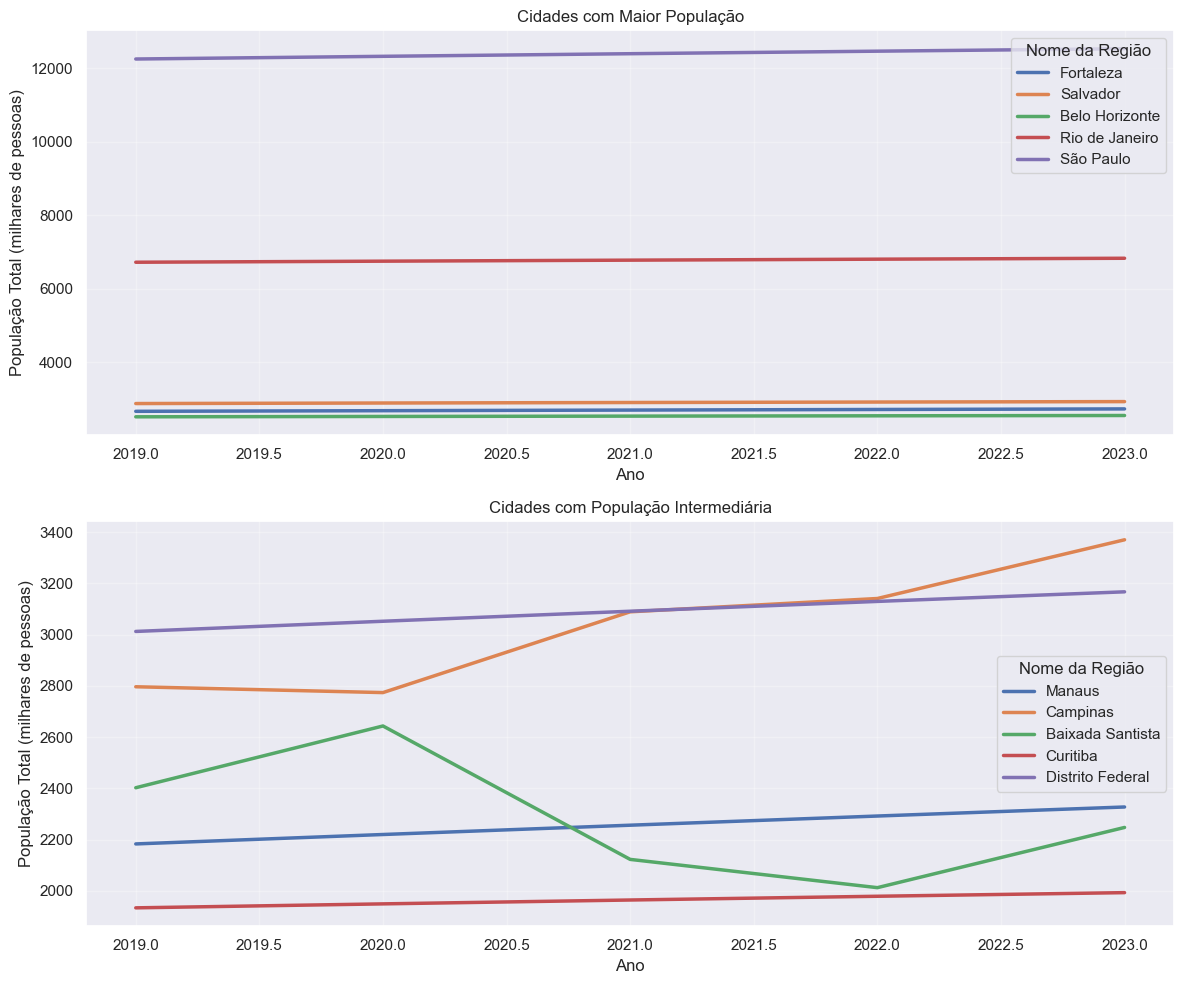

In [38]:
# Dividir as cidades em dois grupos


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Gráfico para cidades grandes
sns.lineplot(data=top_cidades[top_cidades['Nome da Região'].isin(grandes)], 
             y='População Total (milhares de pessoas)', x='Ano', hue='Nome da Região', ax=ax1, linewidth=2.5)
ax1.set_title('Cidades com Maior População')
ax1.grid(True, alpha=0.3)

# Gráfico para cidades médias
sns.lineplot(data=top_cidades[top_cidades['Nome da Região'].isin(medias)], 
             y='População Total (milhares de pessoas)', x='Ano', hue='Nome da Região', ax=ax2, linewidth=2.5)
ax2.set_title('Cidades com População Intermediária')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

C:\Users\lucas.lucca\AppData\Local\Temp\ipykernel_15268\1734300104.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_brasil, x='Ano', y='Taxa de Desocupação (pessoas 14+ anos, %)', palette='viridis')


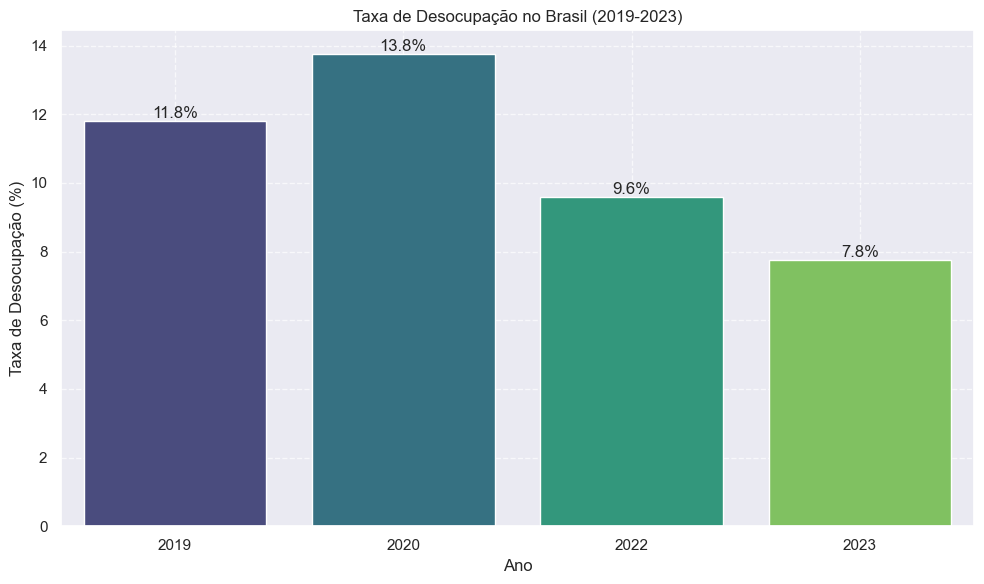

In [39]:
# Gráfico da Taxa de Desocupação para o Brasil ao longo dos anos

# sns.barplot(data=top_cidades, x='Ano', y='Taxa de desocupação das pessoas de 14 anos de idade ou mais (%)', palette='viridis')
# plt.title('Distribuição por Idade (18-29 anos)')
# for container in plt.gca().containers:
#     plt.bar_label(container, fmt='%.1f%%')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_brasil, x='Ano', y='Taxa de Desocupação (pessoas 14+ anos, %)', palette='viridis')
plt.title('Taxa de Desocupação no Brasil (2019-2023)')
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.1f%%')
plt.xlabel('Ano')
plt.ylabel('Taxa de Desocupação (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\lucas.lucca\AppData\Local\Temp\ipykernel_15268\2028221224.py:4: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(data=df_brasil, x='Ano', y='Proporção de Pessoas com Renda Domiciliar Per Capita Abaixo de US$ 6,85 PPC 2017 (%)', color='green', markers='D', linestyles='--', scale=1.2)


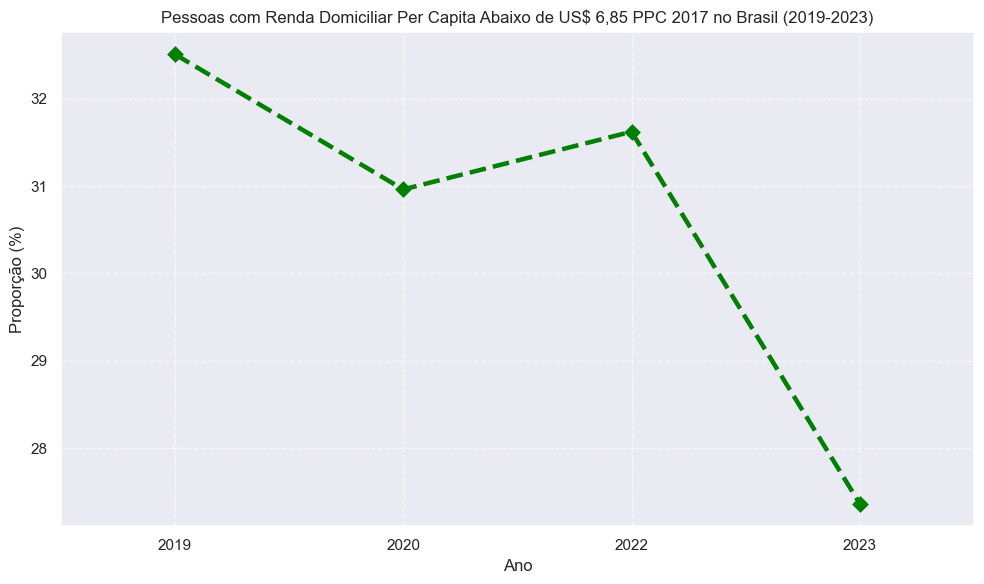

In [40]:
# Gráfico da Proporção de Pessoas com Renda Domiciliar Per Capita Abaixo de US$ 6,85 PPC 2017 para o Brasil

plt.figure(figsize=(10, 6))
sns.pointplot(data=df_brasil, x='Ano', y='Proporção de Pessoas com Renda Domiciliar Per Capita Abaixo de US$ 6,85 PPC 2017 (%)', color='green', markers='D', linestyles='--', scale=1.2)
plt.title('Pessoas com Renda Domiciliar Per Capita Abaixo de US$ 6,85 PPC 2017 no Brasil (2019-2023)')
plt.xlabel('Ano')
plt.ylabel('Proporção (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 2800x700 with 0 Axes>

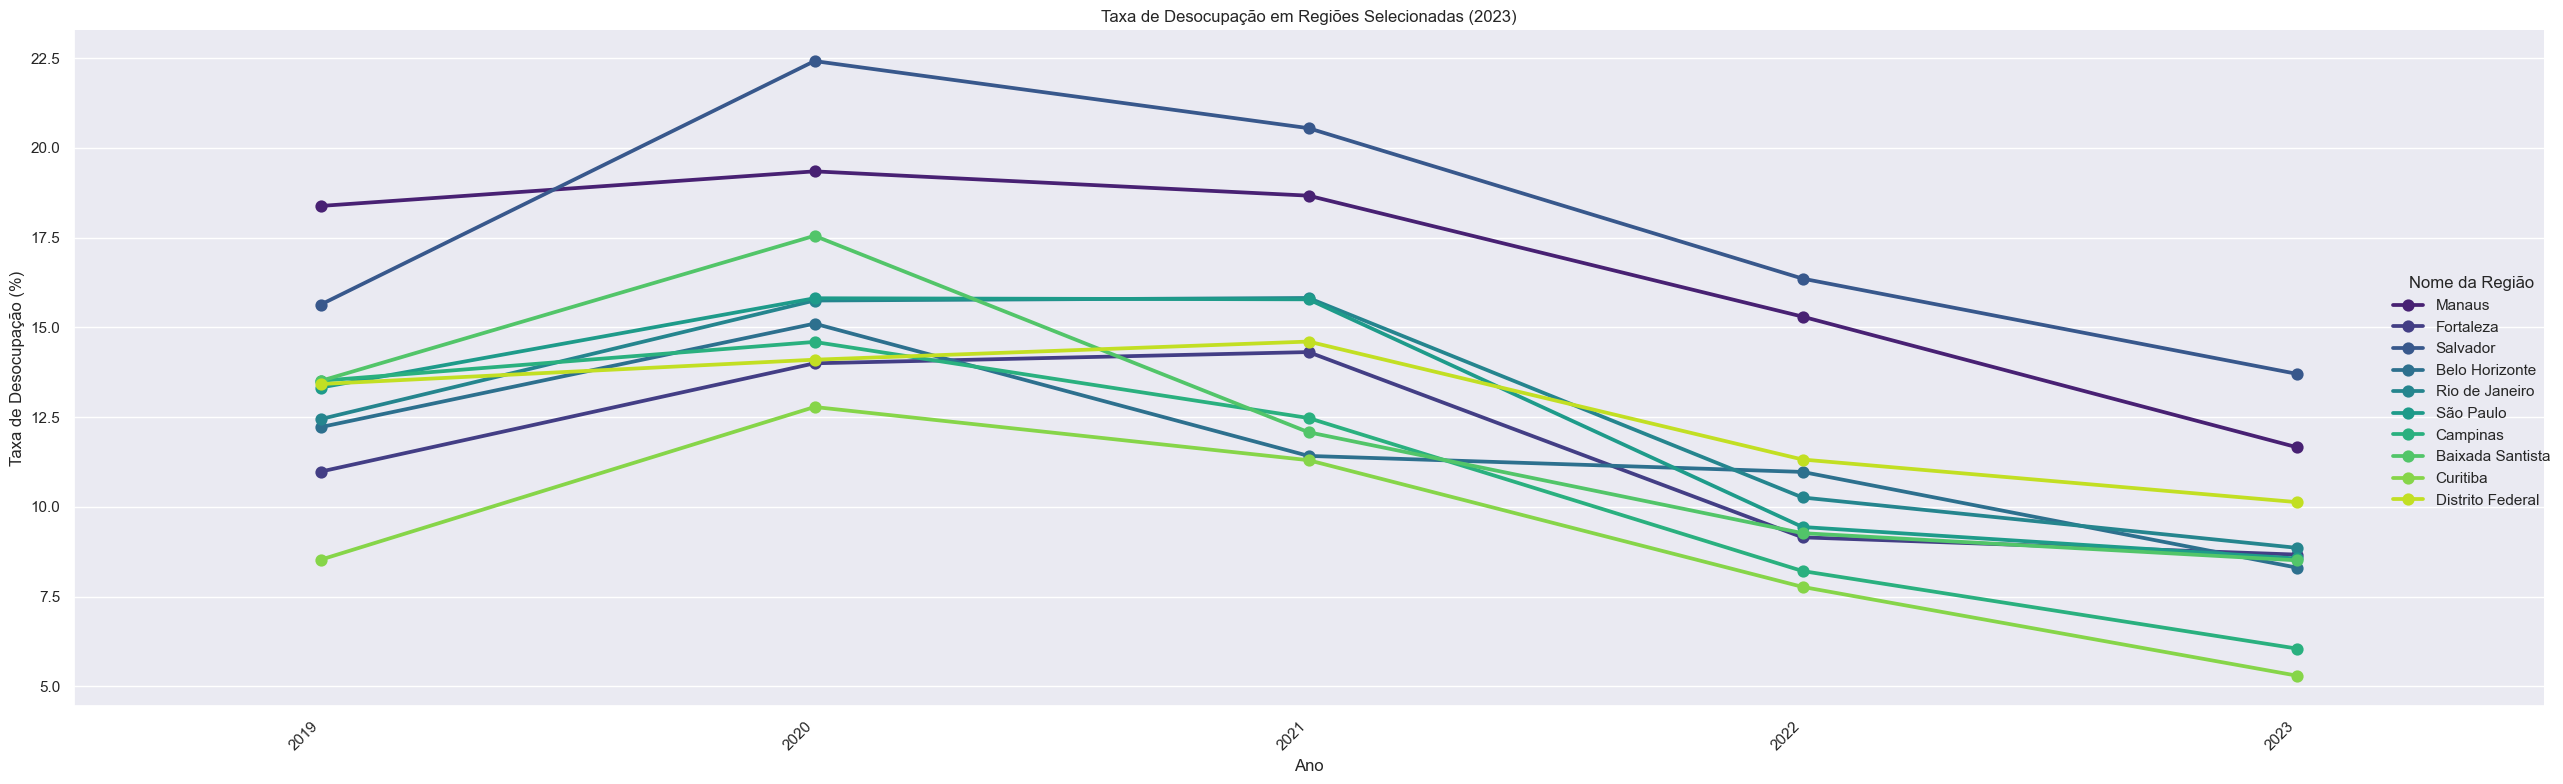

In [41]:
# Comparação de Taxa de Desocupação entre algumas regiões selecionadas em 2023
# Selecionar algumas regiões para comparação (excluindo 'Brasil')
regioes_selecionadas = ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Salvador', 'Porto Alegre', 'Recife', 'Manaus']
# top_cidades = df[(df['Ano'] == '2023') & (df['Nome da Região'].isin(regioes_selecionadas))]

plt.figure(figsize=(28, 7))
sns.catplot(data=top_cidades, x='Ano', hue = 'Nome da Região', y='Taxa de Desocupação (pessoas 14+ anos, %)', palette='viridis',  errorbar="se",kind="point", height=8, aspect=3 )
plt.title('Taxa de Desocupação em Regiões Selecionadas (2023)')
plt.xlabel('Ano')
plt.ylabel('Taxa de Desocupação (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `Nível de ocupação das pessoas de 14 anos de idade ou mais (%)` for `y`. An entry with this name does not appear in `data`.

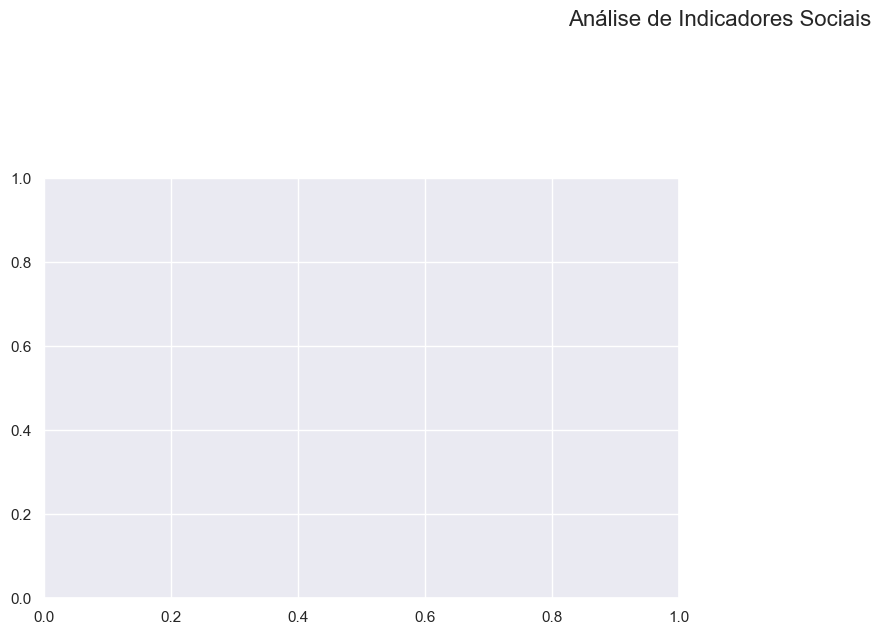

In [21]:
# Configuração do layout dos gráficos
plt.figure(figsize=(18, 12))
plt.suptitle('Análise de Indicadores Sociais', y=1.02, fontsize=16)

# Gráfico 1: Lineplot (evolução temporal)
plt.subplot(2, 2, 1)
sns.lineplot(data=top_cidades, x='Ano', y='Nível de ocupação das pessoas de 14 anos de idade ou mais (%)', 
             marker='o', linewidth=2.5)
plt.title('Evolução do Esgotamento Sanitário')
plt.grid(True, alpha=0.3)

# Gráfico 2: Barplot (comparação por ano)
plt.subplot(2, 2, 2)
sns.barplot(data=top_cidades, x='Ano', y='Taxa de desocupação das pessoas de 14 anos de idade ou mais (%)', palette='viridis')
plt.title('Distribuição por Idade (18-29 anos)')
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.1f%%')

# Gráfico 3: Areaplot (acumulado)
plt.subplot(2, 2, 3)
sns.lineplot(data=top_cidades, x='Ano', y='Proporção de pessoas com rendimento domiciliar per capita abaixo de US$ 6,85 PPC 2017 (%)', 
             color='purple', alpha=0.4)
plt.fill_between(top_cidades['Ano'], top_cidades['Proporção de pessoas com rendimento domiciliar per capita abaixo de US$ 6,85 PPC 2017 (%)'], 
                 color='purple', alpha=0.2)
plt.title('Acesso à Internet')
plt.grid(True, alpha=0.3)

# Gráfico 4: Pointplot (com intervalos)
plt.subplot(2, 2, 4)
sns.pointplot(data=top_cidades, x='Ano', y='Proporção de pessoas de 18 a 29 anos de idade com no mínimo 12 anos de\nestudo (%)', 
              color='green', markers='D', linestyles='--', scale=1.2)
plt.title('Escolaridade (12+ anos de estudo)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()